# Preprocesamiento

En esta etapa se toman decisiones en línea con las estadísticas y análisis con tal de  preparar correctamente los datos que serán parte del entrenamiento y posterior validación de los modelos de predicción.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from nilmtk import DataSet
import warnings
from nilmtk import TimeFrame
warnings. filterwarnings("ignore")
plt.style.use('bmh')



In [4]:
#dataset de referencia DSUALM
deps = DataSet('dsual.h5')

elec=deps.buildings[1].elec # Todos los medidores

labels = pd.DataFrame({'Instances': list(range(1,7)),
                       'Meters': ['Main', 'Fan', 'Freezer', 'Television','Vacuum Cleaner', 'Boiler']})
Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]

## Cambio en el muestreo de datos e interpolación

### Ejemplo seccion faltante

In [5]:
tf=elec[1].good_sections(full_results=True).combined()[0]
tf

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

Muestreo cada 10 segundos, promediando datos

In [6]:
ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:58:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'mean'}))[ta:tb]

physical_quantity,frequency,power,voltage,power,current,power,pf
type,,reactive,,active,,apparent,
2022-02-02 10:16:10+01:00,50.009941,-5.976255,243.948563,15.145640,0.096260,191.709427,0.644985
2022-02-02 10:16:20+01:00,50.003109,-6.076593,243.924240,14.803304,0.093746,171.220123,0.647549
2022-02-02 10:16:30+01:00,49.995876,-6.076886,243.870300,14.591208,0.091261,159.038940,0.655690
2022-02-02 10:16:40+01:00,49.988461,27.890411,242.845306,589.711853,2.688525,inf,0.715962
2022-02-02 10:16:50+01:00,49.979092,62.584034,240.016556,2526.152100,10.662050,inf,0.987122
...,...,...,...,...,...,...,...
2022-02-02 12:57:20+01:00,50.023113,-5.992646,242.294617,12.617174,0.082666,80.440697,0.630069
2022-02-02 12:57:30+01:00,50.022034,-6.142257,242.379272,12.614280,0.081674,80.267578,0.637428
2022-02-02 12:57:40+01:00,50.007778,-5.988403,242.135498,12.451256,0.079819,75.361038,0.644254


Muestreo cada 10 segundos, usando el primer dato

In [7]:
ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:58:00+01:00'
next(elec[1].load(sample_period=10, resample_kwargs={'fill_method':'ffill', 'how': 'first'}))[ta:tb]

physical_quantity,frequency,power,voltage,power,current,power,pf
type,,reactive,,active,,apparent,
2022-02-02 10:16:10+01:00,50.010803,-6.157390,243.951508,15.246300,0.096481,197.418655,0.647985
2022-02-02 10:16:20+01:00,50.007900,-6.066718,243.947998,14.948080,0.095011,178.151337,0.645128
2022-02-02 10:16:30+01:00,49.998501,-6.137362,243.916595,14.898340,0.092960,176.598251,0.656962
2022-02-02 10:16:40+01:00,49.992020,-6.200194,243.891998,14.545600,0.090913,155.541763,0.656028
2022-02-02 10:16:50+01:00,49.982620,63.509418,239.979401,2563.216064,10.700621,inf,0.998165
...,...,...,...,...,...,...,...
2022-02-02 12:57:20+01:00,50.021301,-5.704082,242.236206,12.263480,0.081504,70.458130,0.621199
2022-02-02 12:57:30+01:00,50.024361,-6.230612,242.464600,12.524580,0.082857,77.369026,0.623726
2022-02-02 12:57:40+01:00,50.014759,-5.972212,242.054001,12.654700,0.079952,80.512634,0.654005


# Obtener los datos del medidor principal  cada 60 segundos.

Además del parámetro sample_period=60, requerido para cambiar el muestreo a un minuto, se ha especificado como método (how) de cambio de muestreo el que provee NILMTK por defecto (mean). En el mismo diccionario resample_kwargs se ha especificado el parámetro fill_method el cual corresponderá al método elegido para rellenar los huecos. En este caso se especifica el método ffill el cual, ante un hueco, rellenará los datos faltantes hacia adelante con el valor inmediatamente anterior a la serie de tiempo

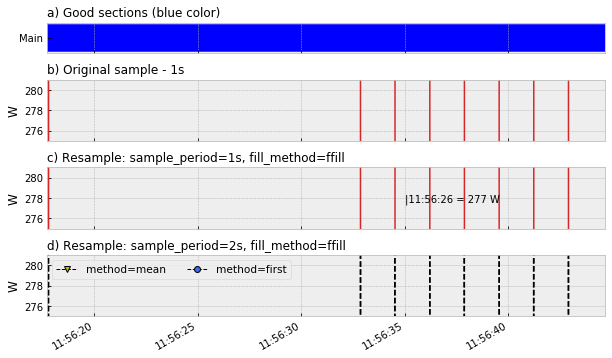

In [8]:
rcParams['figure.figsize'] = (10, 6)

ta = '2022-02-02 10:16:00+01:00'
tb = '2022-02-02 12:58:00+01:00'

Main=elec.select(instance=[1])
fig, (ax4, ax1, ax2, ax3) = plt.subplots(4, 1, sharex=True,
                                         gridspec_kw={'hspace': 0.5,'height_ratios':[1.5, 3, 3, 3]})

elec[1].power_series_all_data()[ta:tb].plot(ax=ax1, color='tab:red', marker="o", lw=1.5)
ax1.minorticks_off()
ax1.set_ylabel('W')
ax1.set_title('b) Original sample - 1s', fontsize=12, loc='left')
ax1.annotate("|11:56:25 = 277 W", xy=('2022-02-02 10:16:00+01:00', 277.6),rotation=7)
ax1.set_ylim(275,281)

elec[1].power_series_all_data(sample_period=1, resample_kwargs={'fill_method': 'ffill'})[ta:tb].plot(ax=ax2, marker="o", color='tab:red',lw=1.5)
ax2.minorticks_off()
ax2.set_ylabel('W')
ax2.set_title('c) Resample: sample_period=1s, fill_method=ffill', fontsize=12, loc='left')
ax2.annotate("|11:56:26 = 277 W", xy=('2022-02-02 12:00:00+01:00', 277.6))
ax2.set_ylim(275,281)

elec[1].power_series_all_data(sample_period=4,resample_kwargs={'how': 'first'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="o",
                                                           markersize=8, markerfacecolor='royalblue')
elec[1].power_series_all_data(sample_period=4, resample_kwargs={'how': 'mean'})[ta:tb].plot(ax=ax3, color='k', lw=1.5, ls='--', marker="v",
                          markersize=8, markerfacecolor='y')
ax3.minorticks_off()
ax3.set_ylabel('W')
ax3.set_title('d) Resample: sample_period=2s, fill_method=ffill', fontsize=12, loc='left')
ax3.set_ylim(275,281)

import matplotlib.lines as mlines
line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=6, markerfacecolor='royalblue', label='method=first')
line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6, markerfacecolor='y', label='method=mean')
ax3.legend(handles=[line2, line1], fontsize=10.5, ncol=2)
ax4=Main.plot_good_sections(ax=ax4)
ax4.set_yticklabels(list(Meters.values()))
ax4.grid(axis='y')
ax4.set_title('a) Good sections (blue color)', fontsize=12, loc='left')
l=['11:56:20','11:56:25','11:56:30','11:56:35','11:56:40','11:56:45','11:56:50']
ax4.set_xticklabels(l, rotation=30, ha='right')

#guarda gráfico
plt.savefig('./data/images/3.1_Prepros_1.svg', bbox_inches='tight', transparent=True)
pass

## Filtros de dispositivos eléctricos

In [9]:
Devices=elec.select(instance=[2,3,4,5,6]) #MeterGroup de dispositivos
d=Devices.energy_per_meter().loc['active']  #energía kWh
d[d>5.85] #filtra dispositivos menores o iguales a 5.85 kWh (5% consumo)

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

Series([], Name: active, dtype: float64)

*top-k*

In [10]:
Devices = elec.select(instance=[2,3,4,5,6])
Devices.select_top_k(k=5)

5/5 ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])nce=1)])

MeterGroup(meters=
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='fan', instance=1)])
)

## División del dataset

- train: conjunto de datos de entrenamiento de modelos de desagregación
- test: conjunto de datos de validación y pruebas de modelos de desagregación

Entrenamiento:

In [23]:
train = DataSet('dsual.h5')

#train.set_window(start="2021-11-11 17:39:00", end="2021-11-11 17:40:00")
train.set_window(start="2022-02-02 10:16:00", end="2022-02-02 10:58:00")

train_elec=train.buildings[1].elec

train_elec.get_timeframe()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 10:58:00+01:00', empty=False)

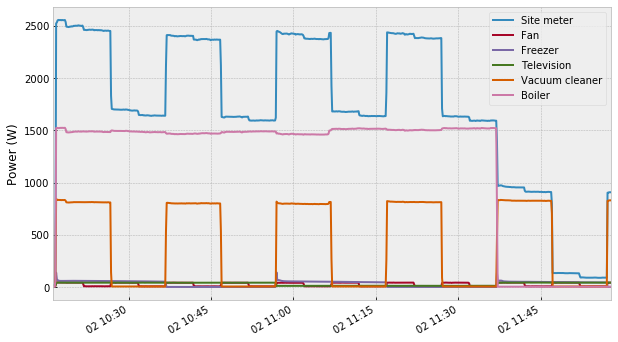

In [18]:
train_elec.plot()
#no hay datos train_elec.submeters().plot()



Validación:

In [24]:
 #Validación 

valid = DataSet('dsual.h5')

train.set_window(start="2022-02-02 10:58:00", end="2022-02-02 12:00:00")

valid_elec=valid.buildings[1].elec

valid_elec.get_timeframe()

TimeFrame(start='2022-02-02 10:16:17+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

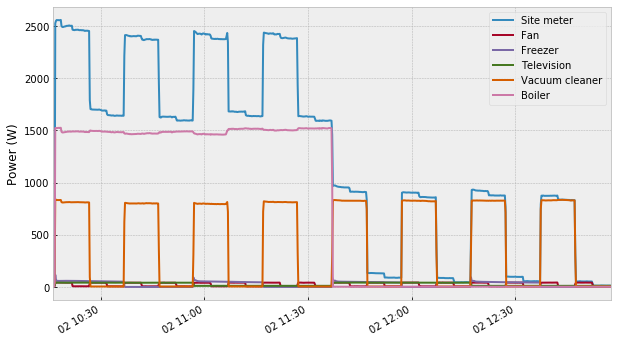

In [25]:
valid_elec.mains().plot()
valid_elec.submeters().plot()

Pruebas

In [26]:


#test=DataSet('C:/data/DEPS.h5') #Pruebas

test = DataSet('dsual.h5')

test.set_window(start="2022-02-02 12:00:00", end="2022-02-02 12:58:00")
test_elec=test.buildings[1].elec

test_elec.get_timeframe()

TimeFrame(start='2022-02-02 12:00:00+01:00', end='2022-02-02 12:58:00+01:00', empty=False)

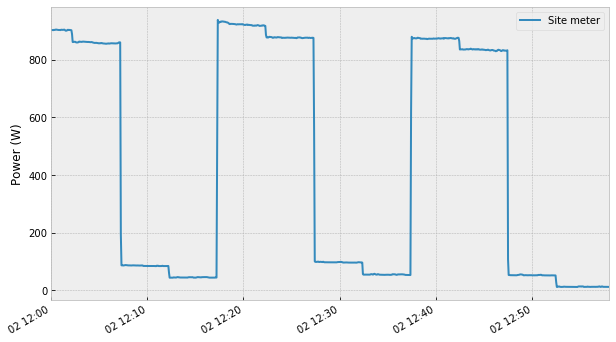

In [27]:
test_elec.mains().plot()